##### Imporitng libraries 

In [1]:
import pandas as pd
import psycopg2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys

##### Defining method to Fetch data from DB and creating custo exception class for handling exceptions

In [2]:
def fetch_data_From_db():
    conn = psycopg2.connect("dbname=postgres user=postgres password=welcome")
    cur = conn.cursor()
    cur.execute("SELECT * FROM bank_churn_data ")
    records = cur.fetchall()
    return records

In [3]:
def save_to_csv(data , file_name):
    try:
        data.to_csv(file_name)
        print("file saved sucessfully")
    except Exception :
        print("Failed to save file")

In [4]:
class MyException(Exception):
    pass

##### Defining Column names 

In [5]:
column_names = ['customer_id' , 'name' , 'credit_score' ,'country' ,'gender' ,'age' ,'tenure_in_months' ,'balance' ,'products_number'
,'credit_card' ,'active_member' ,'estimated_salary' , 'exit_status' ]

##### Loading data into Dataframe 

In [6]:
try:
    data = pd.DataFrame( data = fetch_data_From_db (), columns = column_names  )
    if data.empty:
        raise MyException("No Data Available at source")
except MyException as e:
    print(e)    
except Exception :
    print("Failed to fetch data from DB")


In [7]:
data.tail()

,customer_id,name,credit_score,country,gender,age,tenure_in_months,balance,products_number,credit_card,active_member,estimated_salary,exit_status
9995,15606229,Obijiaku,771,France,Male,39,60,NaN,2,True,No,96270.64,Not Exited
9996,15569892,Johnstone,516,France,Male,35,120,57369.61,1,True,Yes,101699.77,Not Exited
9997,15584532,Liu,709,France,Female,36,84,NaN,1,False,Yes,42085.58,Exited
9998,15682355,Sabbatini,772,Germany,Male,42,36,75075.31,2,True,No,92888.52,Exited
9999,15628319,Walker,792,France,Female,28,48,130142.79,1,True,No,38190.78,Not Exited


##### Checking out data and cleaning it


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   name              10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   country           10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure_in_months  10000 non-null  int64  
 7   balance           6383 non-null   float64
 8   products_number   10000 non-null  int64  
 9   credit_card       10000 non-null  bool   
 10  active_member     10000 non-null  object 
 11  estimated_salary  10000 non-null  float64
 12  exit_status       10000 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 947.4+ KB


In [9]:
data.isnull().sum().to_dict()

{'customer_id': 0,
 'name': 0,
 'credit_score': 0,
 'country': 0,
 'gender': 0,
 'age': 0,
 'tenure_in_months': 0,
 'balance': 3617,
 'products_number': 0,
 'credit_card': 0,
 'active_member': 0,
 'estimated_salary': 0,
 'exit_status': 0}

In [10]:
data['balance'].replace(np.NaN , 0 , inplace = True)
data.dropna(inplace = True)

In [11]:
data.isnull().sum().to_dict()

{'customer_id': 0,
 'name': 0,
 'credit_score': 0,
 'country': 0,
 'gender': 0,
 'age': 0,
 'tenure_in_months': 0,
 'balance': 0,
 'products_number': 0,
 'credit_card': 0,
 'active_member': 0,
 'estimated_salary': 0,
 'exit_status': 0}

In [12]:
print(f"data shape before dropping duplicates : {data.shape}")
data.drop_duplicates()
print(f"data shape after dropping duplicates : {data.shape}")


data shape before dropping duplicates : (10000, 13)
data shape after dropping duplicates : (10000, 13)


In [13]:
data.dtypes

customer_id           int64
name                 object
credit_score          int64
country              object
gender               object
age                   int64
tenure_in_months      int64
balance             float64
products_number       int64
credit_card            bool
active_member        object
estimated_salary    float64
exit_status          object
dtype: object

In [14]:
def remove_columns(cols_list):
    try : 
        for i in cols_list:
            if i in data.columns:
                data.drop(i , axis = 1 , inplace = True)
            else :  
                raise MyException("Column not available in source")
        print("columns popped sucessfully")
    except MyException as e:
        print(e)    
    except Exception :
        print("Exception occured while removing columns")

remove_columns (['customer_id' , 'name'])


columns popped sucessfully


##### Analysisng Retained - exit stats 

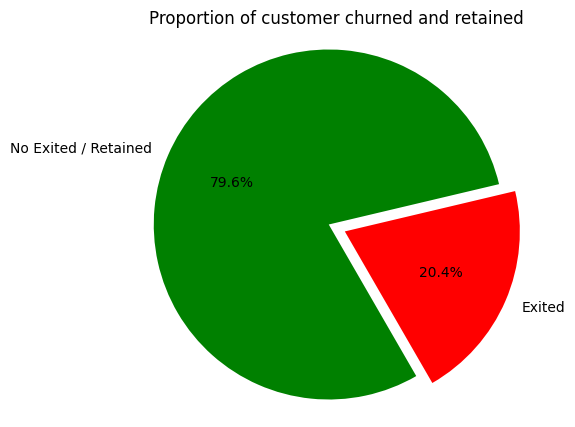

In [15]:
labels = 'Exited', 'No Exited / Retained'
sizes = [data['exit_status'][data['exit_status']=='Exited'].count(), data['exit_status'][data['exit_status'] == 'Not Exited'].count()]
figure, axis = plt.subplots(figsize=(5, 5))
axis.pie(sizes, explode=(0.1, 0), labels=labels, autopct='%1.1f%%', colors = ['red' , 'green'], startangle=300)
axis.axis('equal')
plt.title("Proportion of customer churned and retained")
plt.show()

##### from above pie chart we can observer that  20.4 % people have rejected or exited from bank services till date , Let's analyze it further more

##### Analysing churn's W.R.T country  and Gender

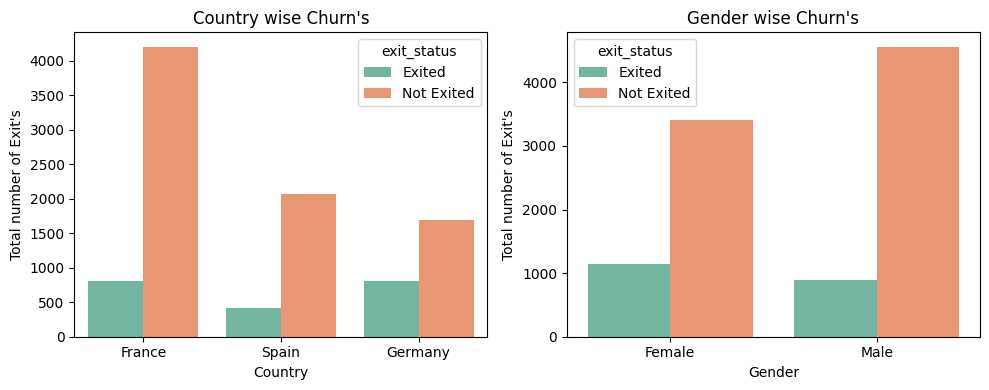

In [16]:
fig, (axis1, axis2) = plt.subplots(ncols=2, figsize=(10, 4))
sns.countplot(x='country', hue='exit_status',  palette="Set2" , data=data , ax = axis1).set(
    xlabel="Country" , ylabel = "Total number of Exit's" , title = "Country wise Churn's")
sns.countplot(x='gender', hue='exit_status',  palette="Set2" , data=data ,  ax = axis2).set(
    xlabel="Gender" , ylabel = "Total number of Exit's" , title = "Gender wise Churn's")
plt.tight_layout()
plt.show()


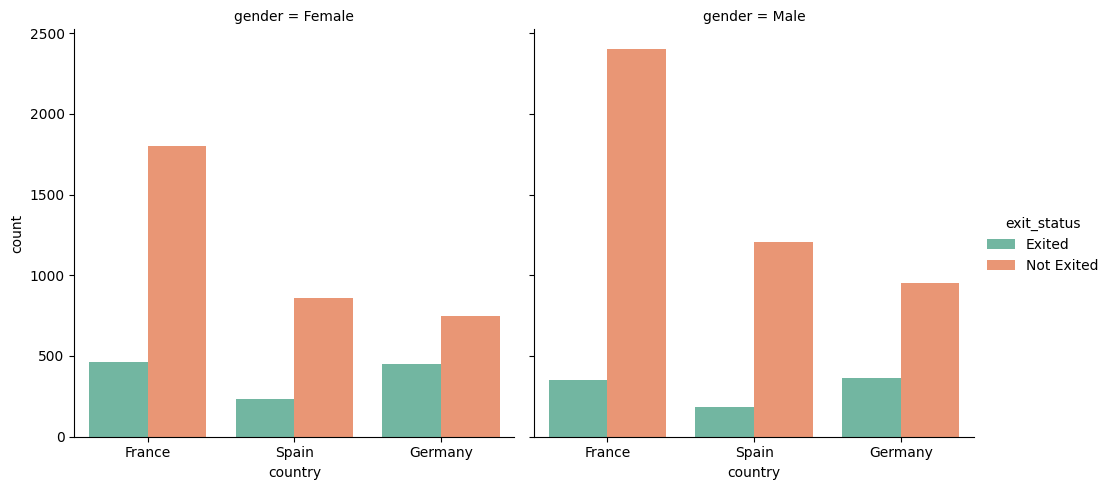

In [17]:
sns.catplot(x="country", hue="exit_status", col="gender", data=data, kind="count", palette="Set2")
plt.show()

###### From the above plots, we can conclude that people from france are likely to be more retained,  whereas germany has less retention rate in both genders. Spain has more rentation followed by france

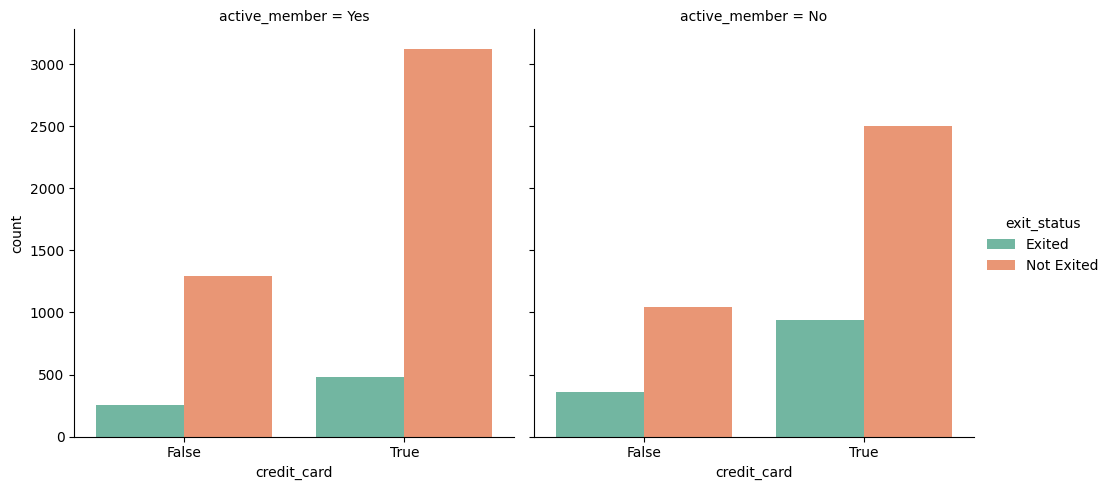

In [18]:
sns.catplot(x="credit_card", hue="exit_status", col="active_member" , data=data, kind="count", palette="Set2")
plt.show()

##### From the above plot we can assume that people with credit card are having more retantion. Further more customer with credit card and using bank services are more retained

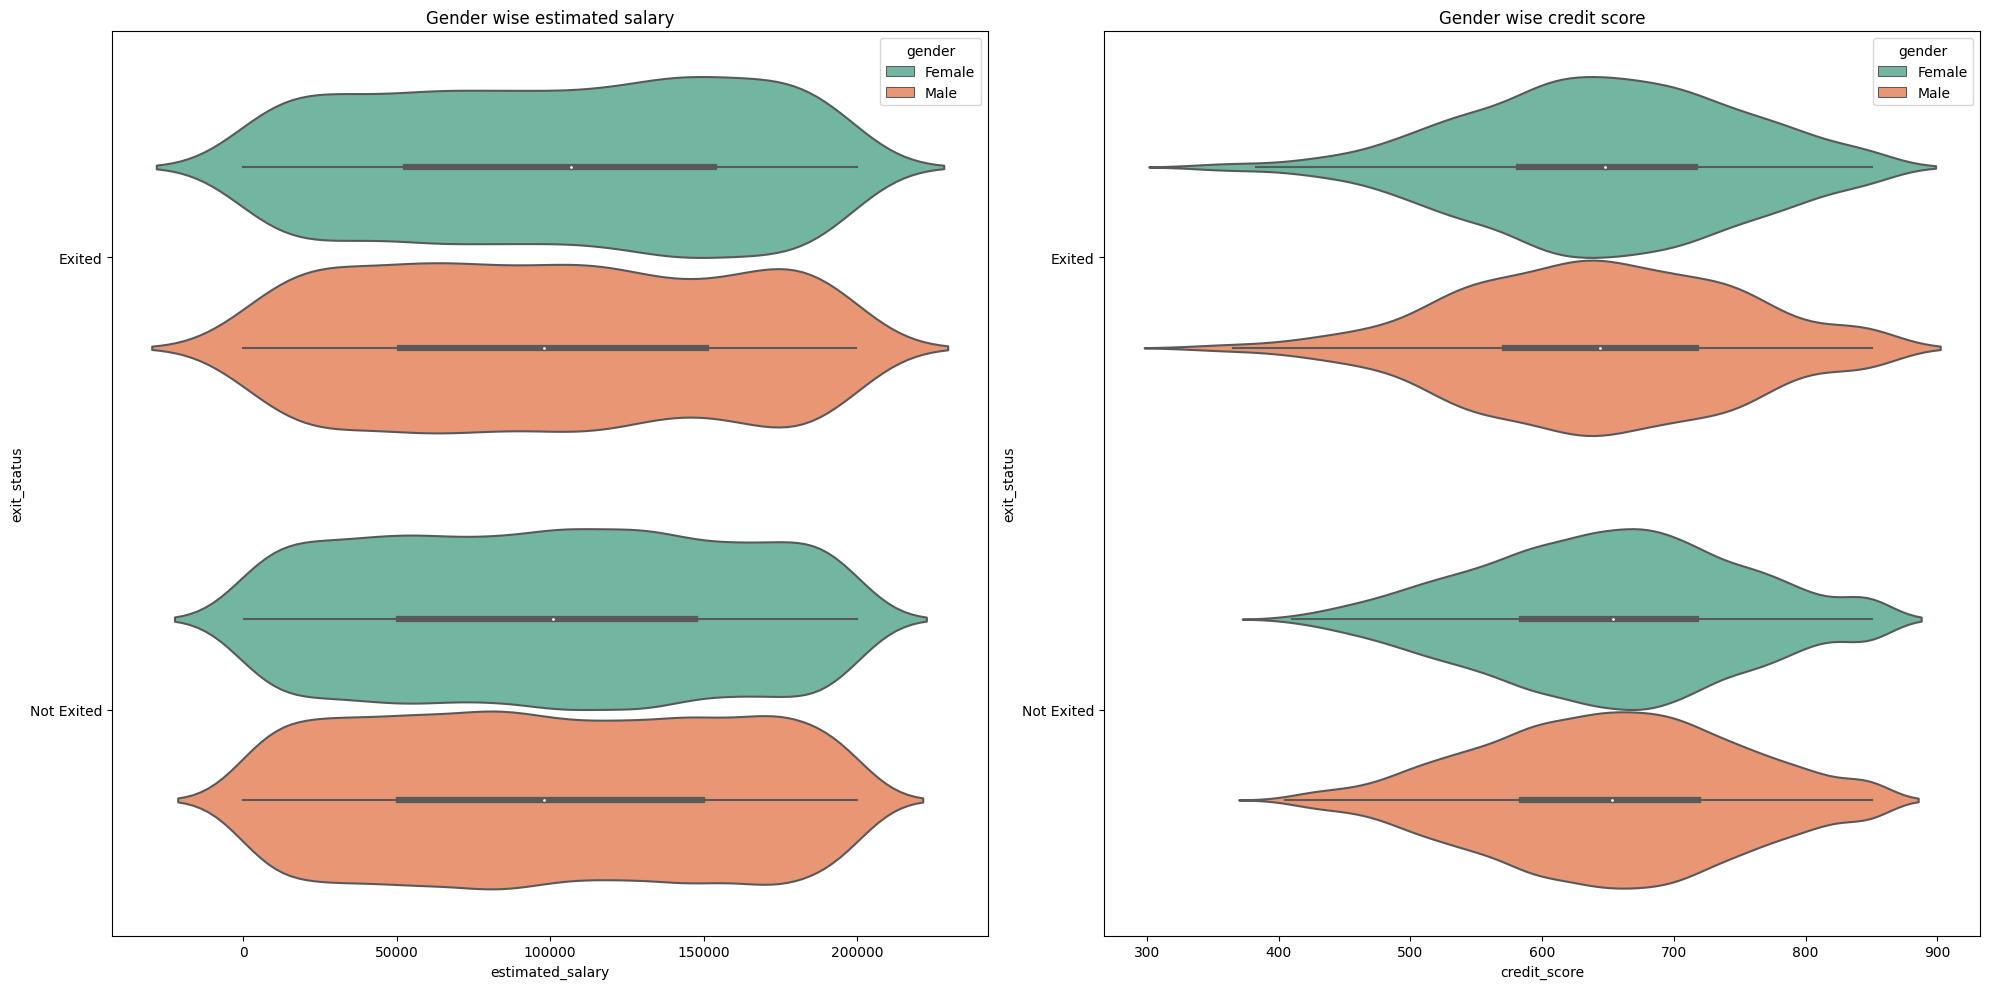

In [19]:
fig, (axis1, axis2) = plt.subplots(ncols=2, figsize=(20, 10))
plot = sns.violinplot(data=data, x='estimated_salary' , y = 'exit_status'  , hue = 'gender' ,palette="Set2" , ax = axis1)
plot.set_title("Gender wise estimated salary")
plot = sns.violinplot(data=data, x='credit_score' , y = 'exit_status' , hue = 'gender' , palette="Set2" ,ax = axis2)
plot.set_title("Gender wise credit score")
plt.tight_layout()
plt.show()


##### From the above plots we can identify that, people who have retained and exited are almost having similar salaries  but from the second plot, we can observe that people with high credit score are retained and low credit score are likely to exit  

##### Plotting Histograms and Box plots to observe data in breif 

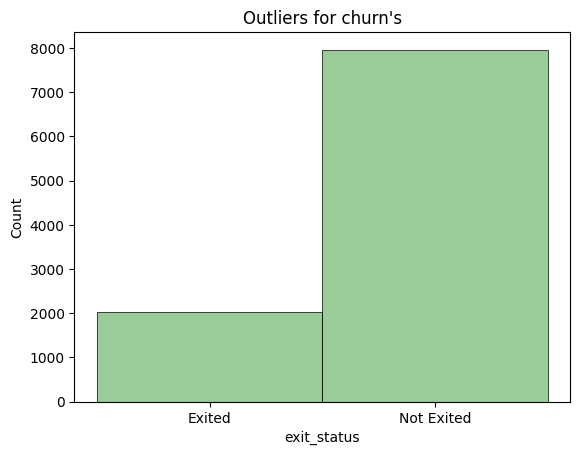

In [20]:
sns.histplot(data=data, x="exit_status", color="green", alpha=0.4, edgecolor="black", linewidth=0.5)
plt.title("Outliers for churn's")
plt.show()



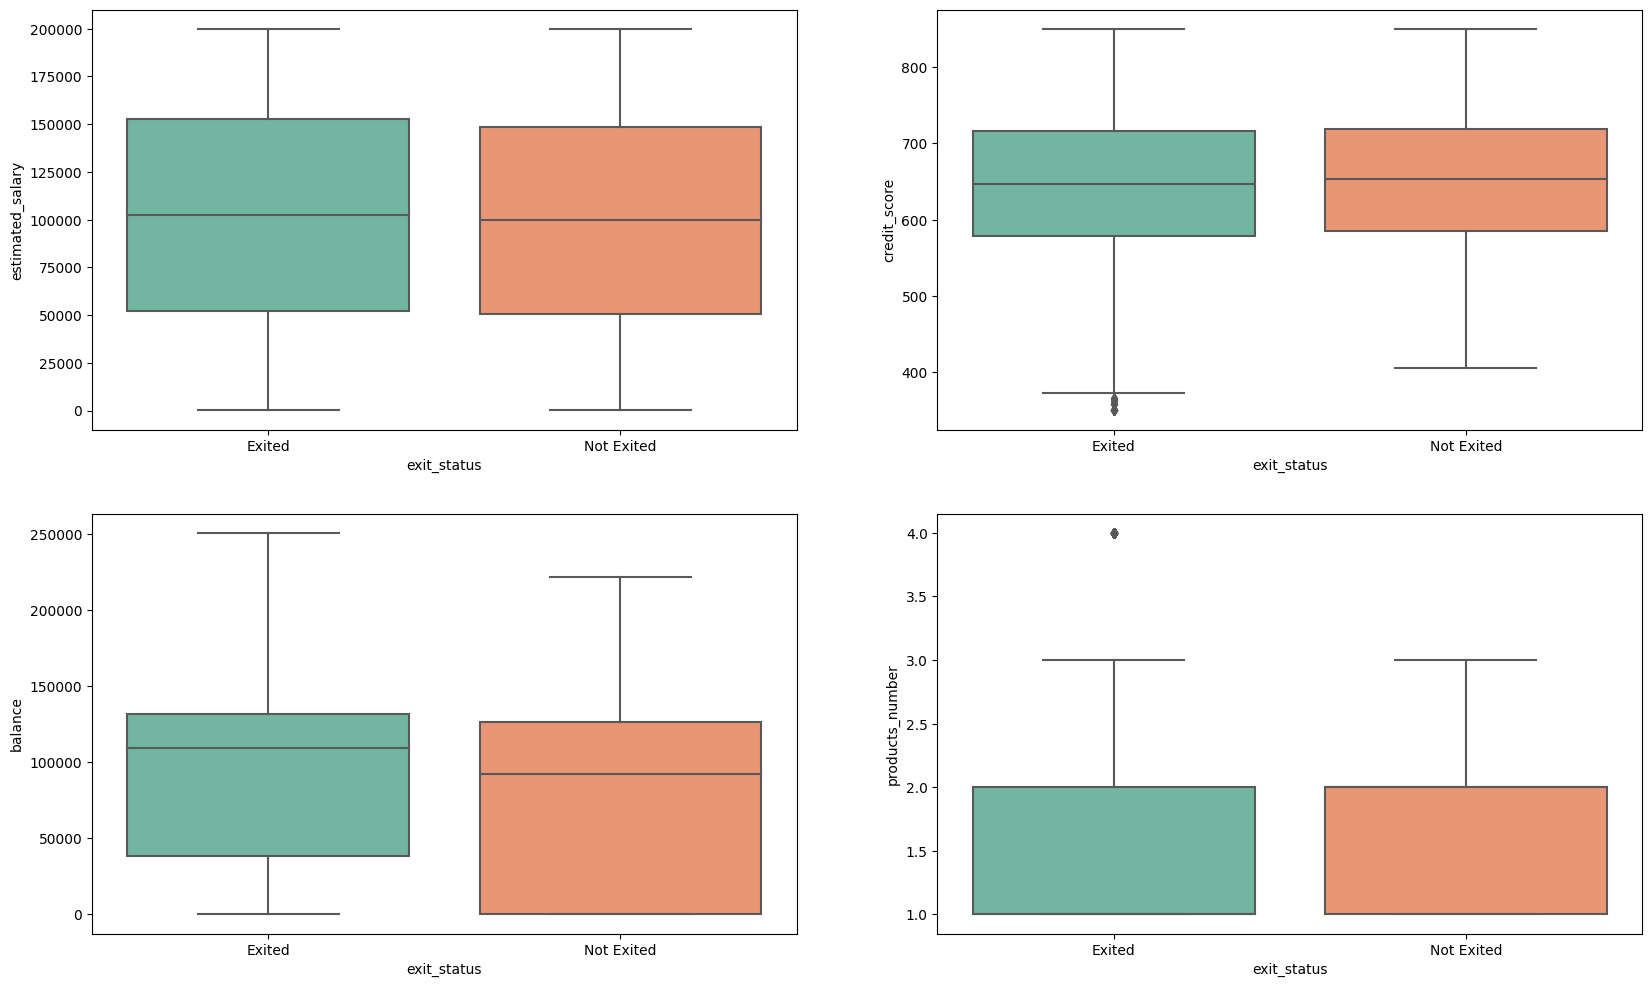

In [21]:
fig, axis = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(x =data['exit_status'], y = data['estimated_salary'], orient='v' , palette="Set2" , ax=axis[0][0])
sns.boxplot(x =data['exit_status'], y = data['credit_score'], orient='v' , palette="Set2" , ax=axis[0][1])
sns.boxplot(x =data['exit_status'], y = data['balance'], orient='v' , palette="Set2" , ax=axis[1][0])
sns.boxplot(x =data['exit_status'], y = data['products_number'], orient='v' , palette="Set2" , ax=axis[1][1])
plt.show()


#### from the above plots we can observer that there is no impact of products taken and estimated salary on churning but churned rate is higher even after having good bank balance

##### Plotting scatter plots for credit score , balance and estimated salary  w.r.t Age to observe churn rate

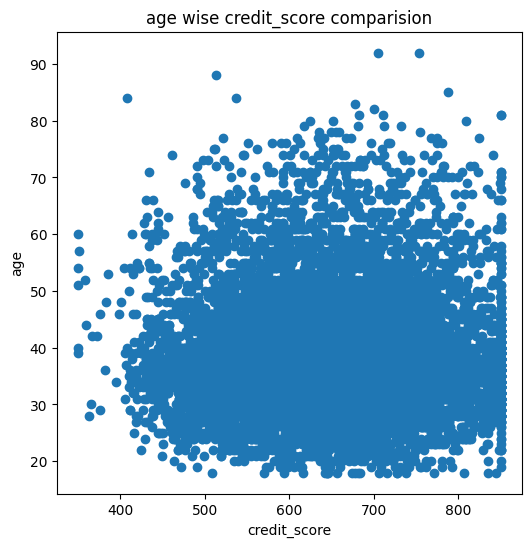

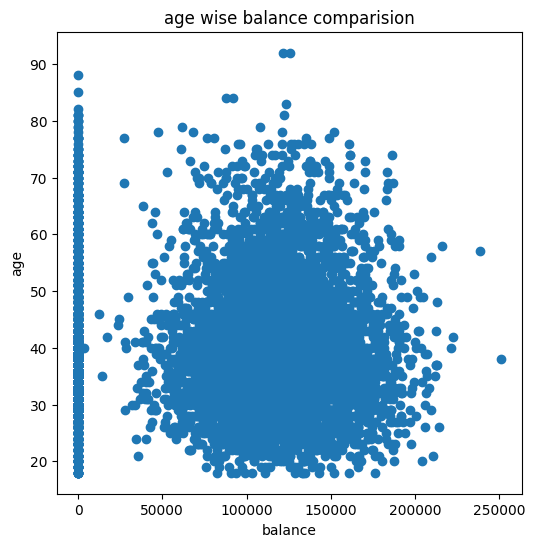

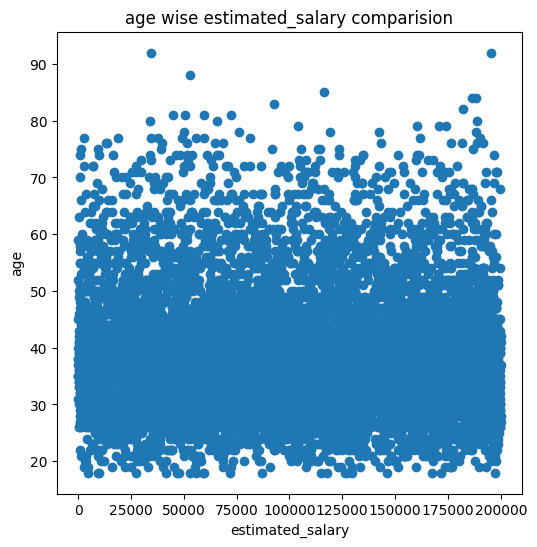

In [22]:

for i in ['credit_score', 'balance' ,'estimated_salary'  ]:
  fig,ax=plt.subplots(figsize=(6,6))
  plt.scatter(y= data["age"],x=data[i])
  plt.title(f"age wise {i} comparision")
  plt.xlabel("{}".format(i))
  plt.ylabel("age")

##### Visulaizing the same data w.r.t churn status using joint plot to get more clear picture 

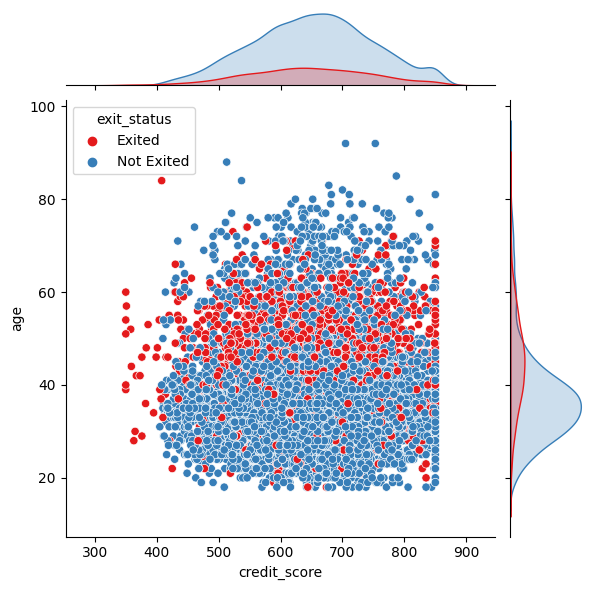

In [23]:
sns.jointplot(data=data,x=data['credit_score'],y=data['age'],hue=data['exit_status'] , palette = 'Set1')
plt.show()

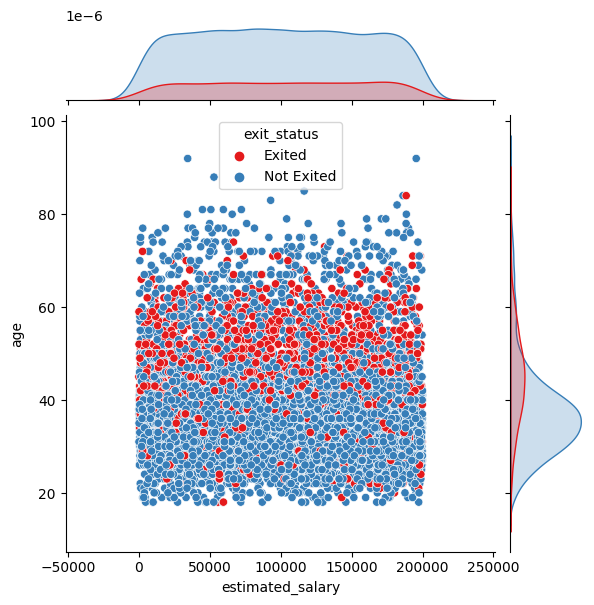

In [24]:
sns.jointplot(data=data,x=data['estimated_salary'],y=data['age'],hue=data['exit_status'] , palette = 'Set1')
plt.show()

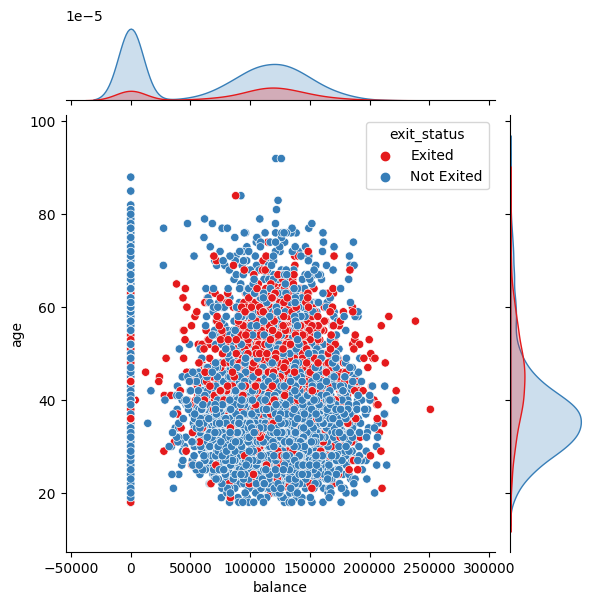

In [25]:
sns.jointplot(data=data,x=data['balance'],y=data['age'],hue=data['exit_status'] , palette = 'Set1')
plt.show()

###### From the above  joint plots we can observe that people from age group between 40-60 are exiting more as compared other age groups

##### Plotting regression plots to observe relation between two features

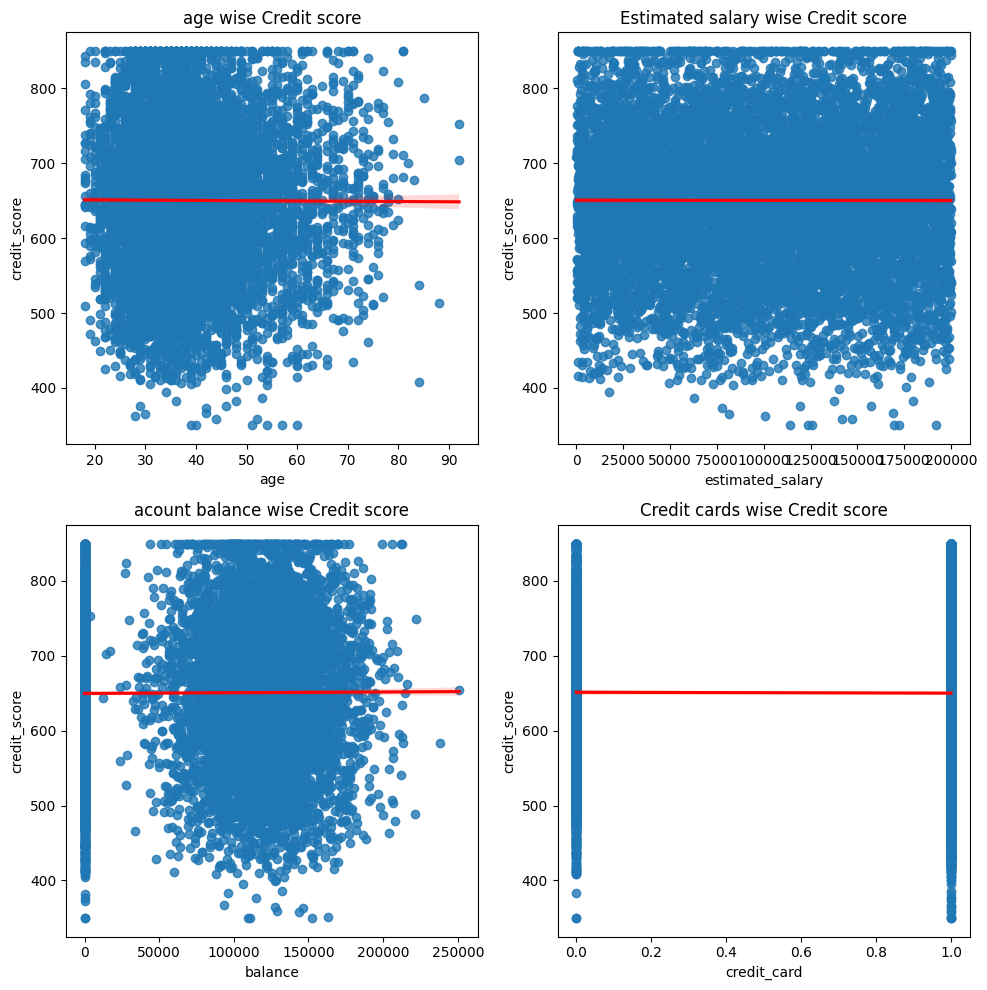

In [26]:
fig, axis = plt.subplots(nrows = 2, ncols=2, figsize=(10, 10))
sns.regplot(data=data, x='age', y= 'credit_score', line_kws={'color':'red'} ,ax=axis[0, 0])
axis[0, 0].set_title("age wise Credit score")
sns.regplot(data=data, x='estimated_salary', y= 'credit_score', line_kws={'color':'red'},ax=axis[0, 1])
axis[0, 1].set_title("Estimated salary wise Credit score")
sns.regplot(data=data, x='balance', y= 'credit_score', line_kws={'color':'red'} ,ax=axis[1, 0])
axis[1, 0].set_title("acount balance wise Credit score")
sns.regplot(data=data, x='credit_card', y= 'credit_score', line_kws={'color':'red'} ,ax =axis[1, 1])
axis[1, 1].set_title("Credit cards wise Credit score")
plt.tight_layout()
plt.show()


##### Performing EDA to get more stable data to proceed further and identify churn's

In [27]:
data['tenure'] = data['tenure_in_months'].apply(lambda x : int(x/12))
data['gender'] = data['gender'].apply(lambda x : 0 if x == 'Female' else (1 if x == 'Male' else -1))
data['active_member'] = data['active_member'].apply(lambda x : 0 if x == 'No' else 1)
data['credit_card'] = data['credit_card'].apply(lambda x : 0 if x == 0 else 1)
data['exit_status'] = data['exit_status'].apply(lambda x : 0 if x == 'Exited' else 1)
remove_columns(['tenure_in_months'])
save_to_csv(data , 'cleaned_data.csv')

columns popped sucessfully
file saved sucessfully


##### converting categorical variables into a series of  binary variables 

In [28]:
dummy_data = pd.get_dummies(data['country'])
dummy_data.rename(columns={"France" : "is_french" , "Spain" :"is_spaniard" , "Germany" : "is_german"}, inplace=True)

##### Merging obtained data with main data frame 

In [29]:
data = pd.concat([data, dummy_data], axis= 1)
data.drop("country", inplace=True, axis=1)
data.head()

,credit_score,gender,age,balance,products_number,credit_card,active_member,estimated_salary,exit_status,tenure,is_french,is_german,is_spaniard
0,619,0,42,0.00,1,1,1,101348.88,0,2,1,0,0
1,608,0,41,83807.86,1,0,1,112542.58,1,1,0,0,1
2,502,0,42,159660.80,3,1,0,113931.57,0,8,1,0,0
3,699,0,39,0.00,2,0,0,93826.63,1,1,1,0,0
4,850,0,43,125510.82,1,1,1,79084.10,1,2,0,0,1


In [30]:
data.dtypes

credit_score          int64
gender                int64
age                   int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
exit_status           int64
tenure                int64
is_french             uint8
is_german             uint8
is_spaniard           uint8
dtype: object

##### Plotting Pair plot to identify relation between all the features available

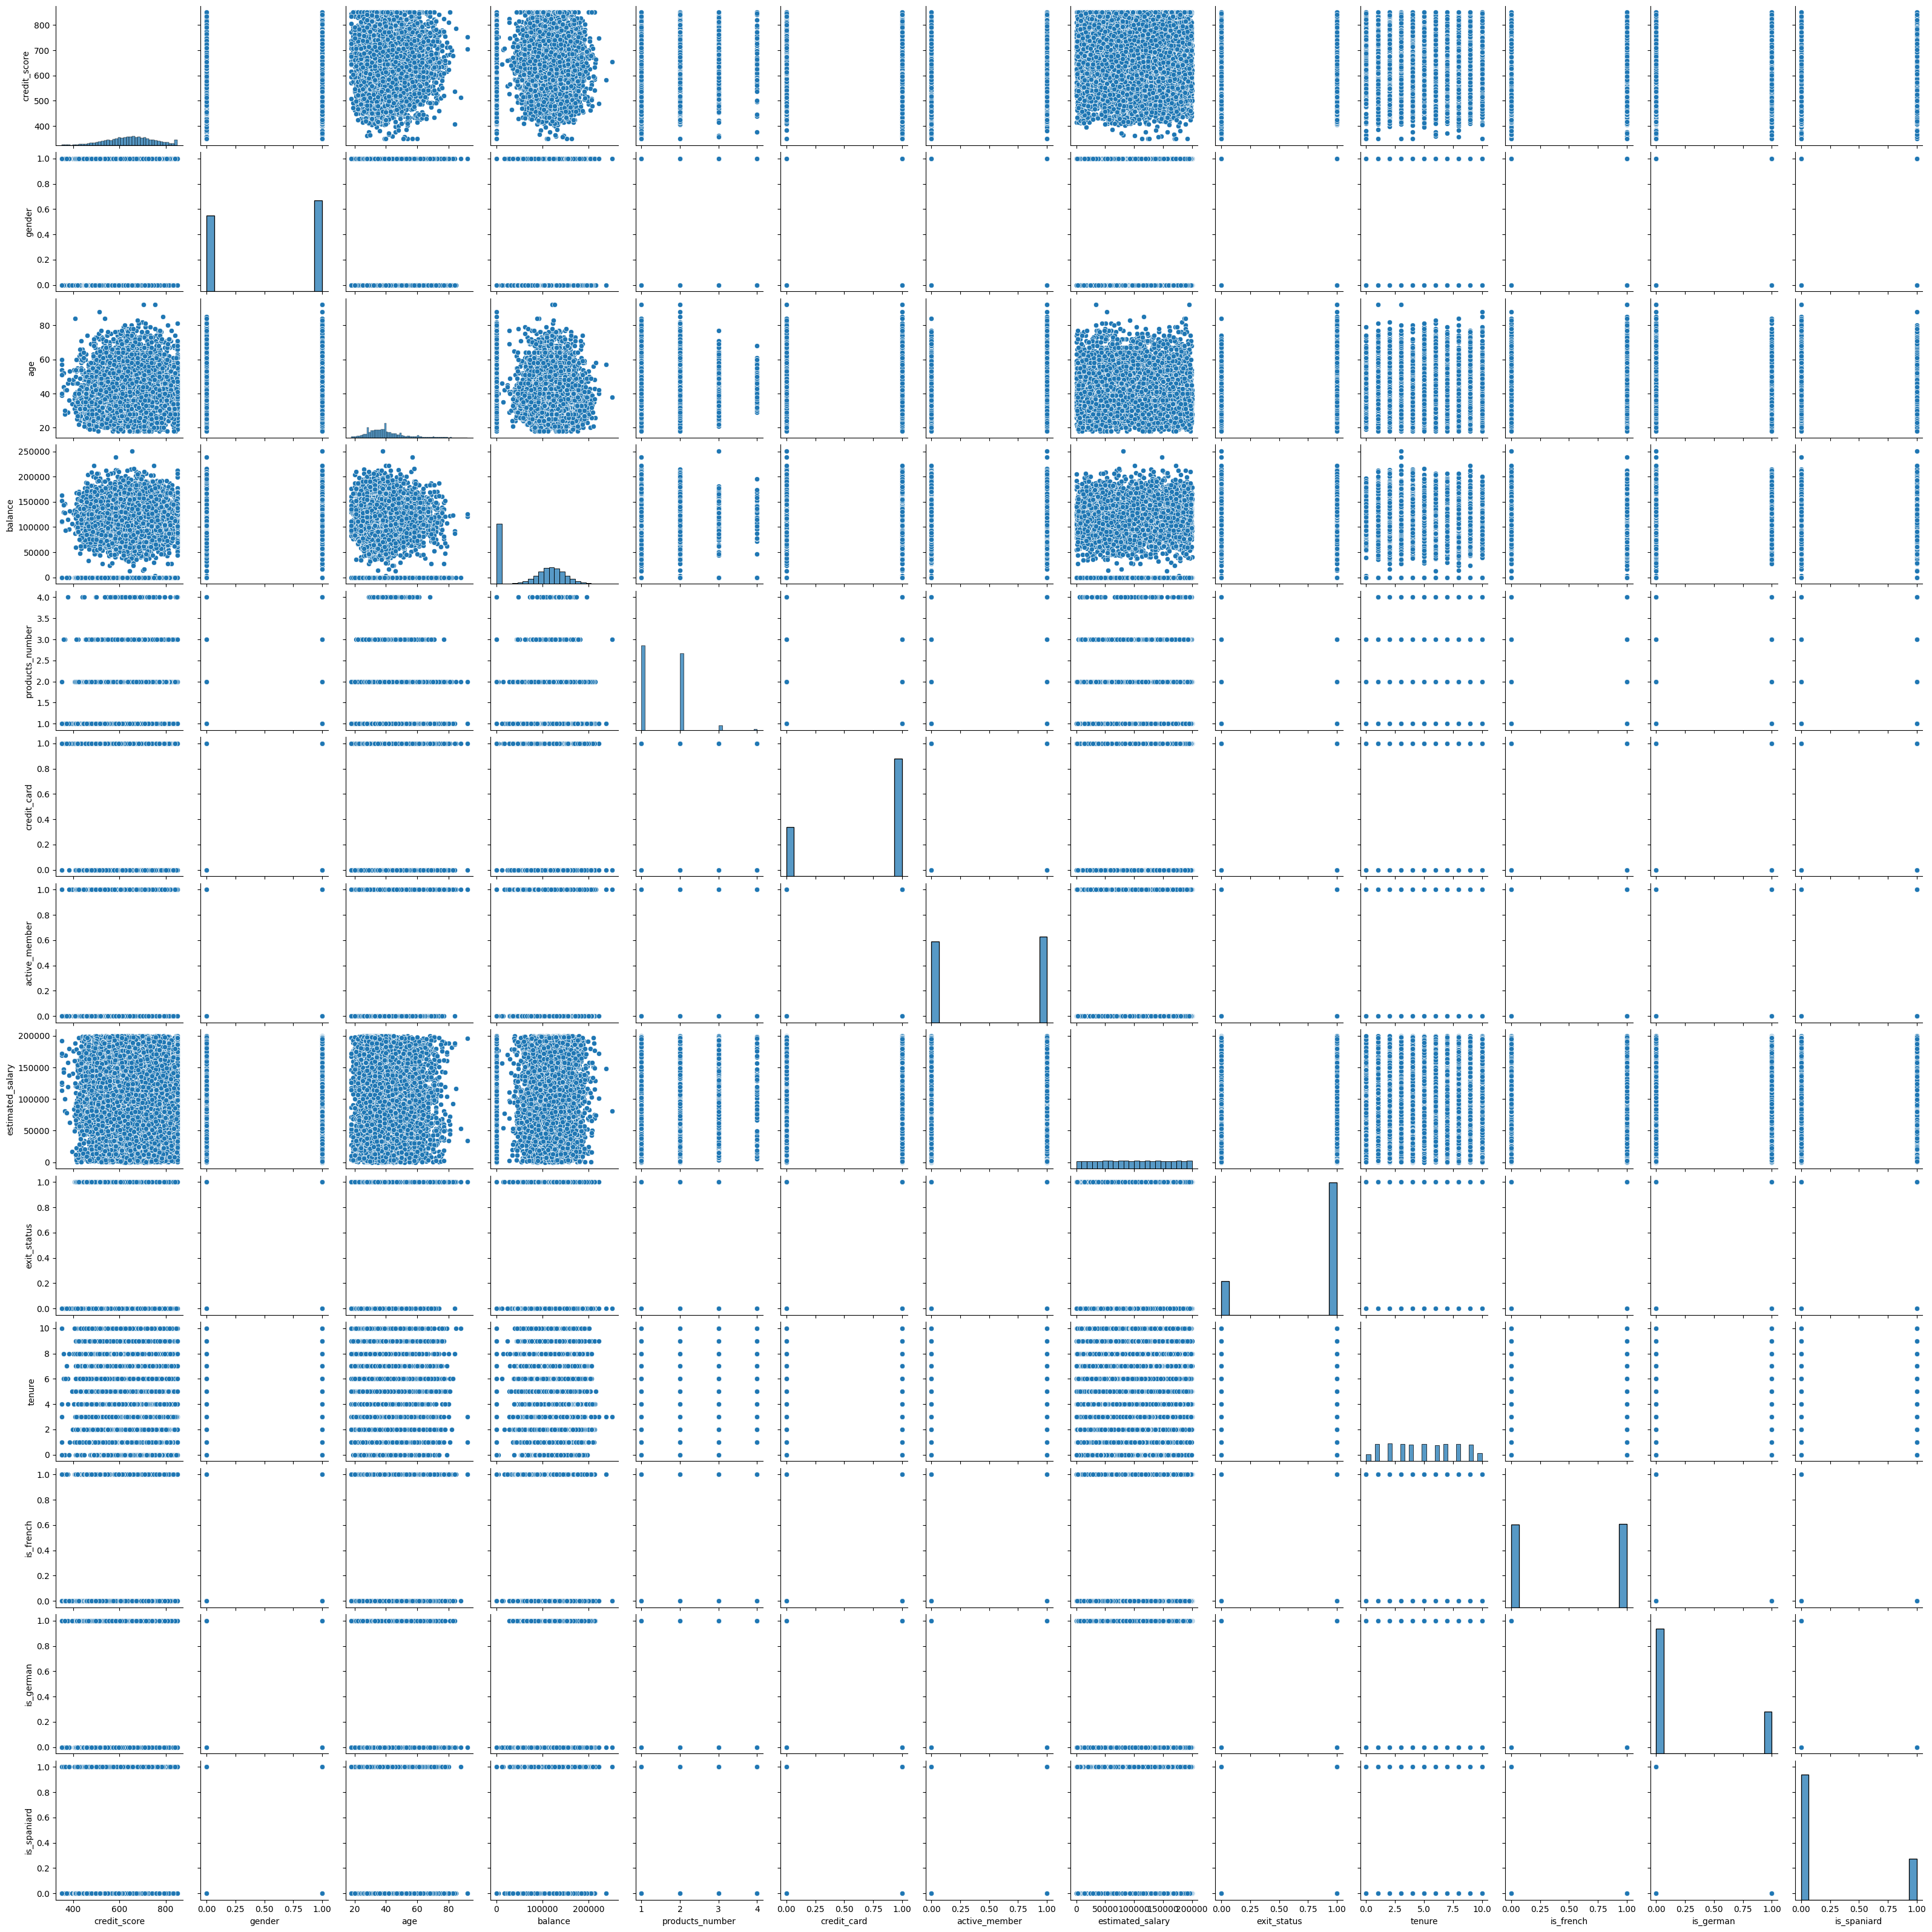

In [47]:
sns.pairplot(data=data)
plt.show()

##### Plotting heat map to identify co-relation between two features

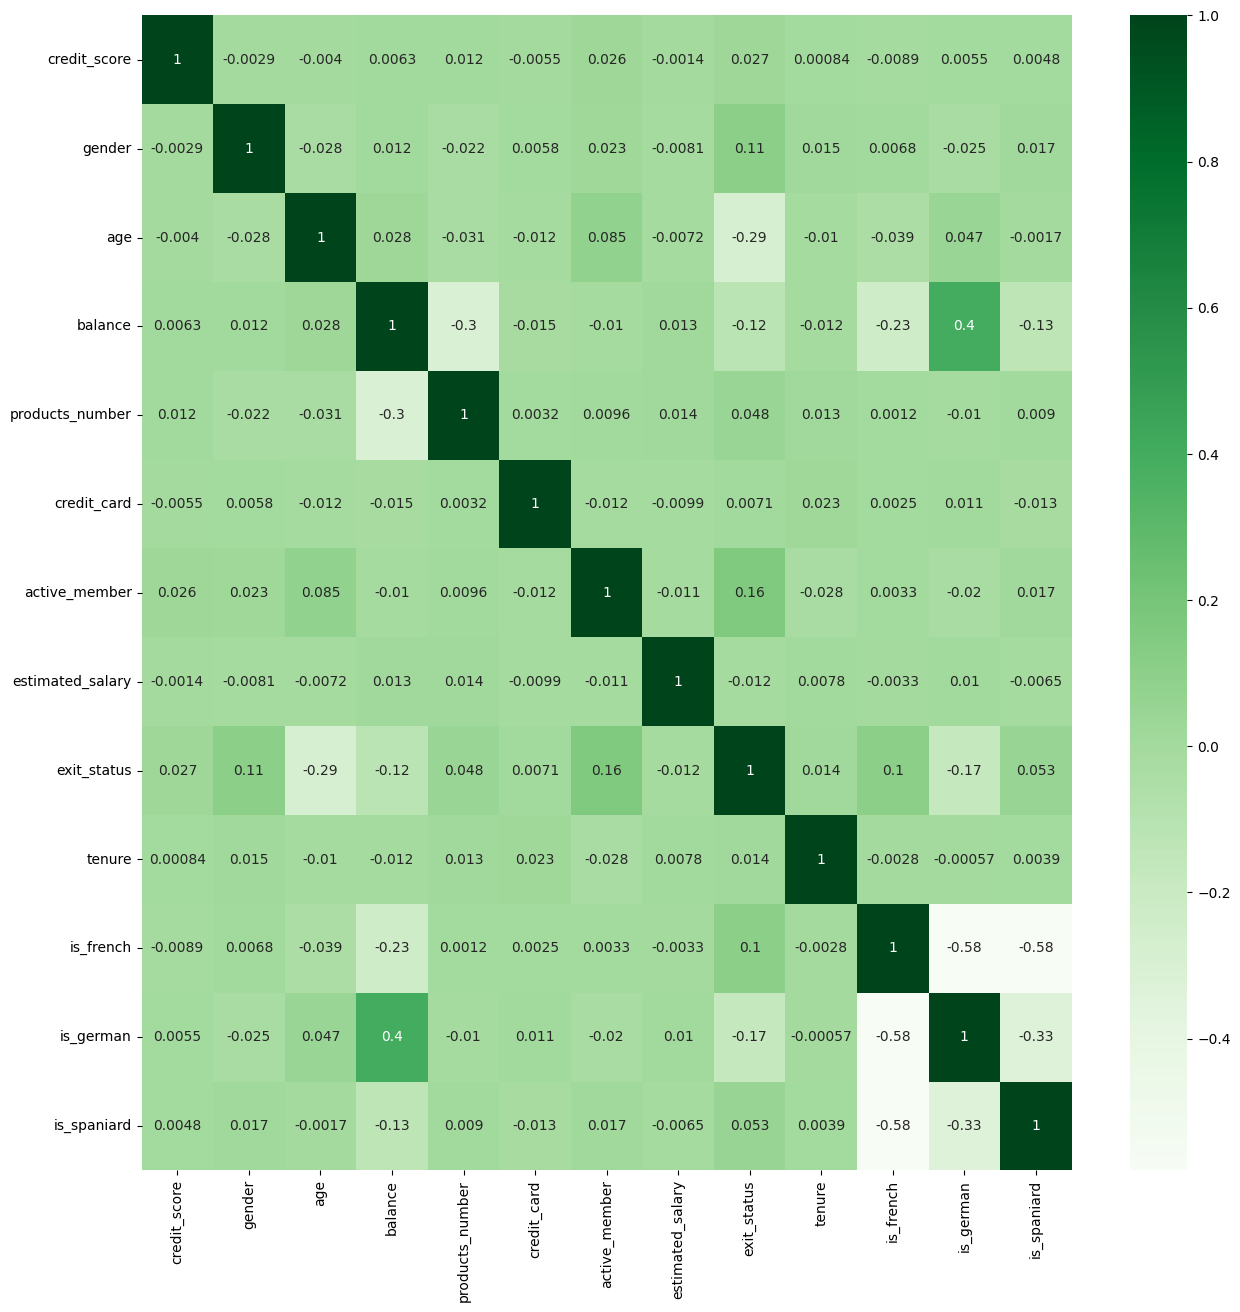

In [32]:
data_copy = data.copy()
plt.subplots(figsize = ([15,15]))
sns.heatmap(data_copy.corr(),cmap = 'Greens',annot = True)
plt.show()

In [33]:
featured_columns = ['age' , 'credit_score', 'balance' ,'estimated_salary' , 'tenure' , 'active_member' , 'gender',
                   'is_french' , 'is_german' , 'is_spaniard' , 'exit_status']

##### Representing data in form of Matrix 

In [34]:
matrix = data.values
matrix

array([[619.,   0.,  42., ...,   1.,   0.,   0.],
       [608.,   0.,  41., ...,   0.,   0.,   1.],
       [502.,   0.,  42., ...,   1.,   0.,   0.],
       ...,
       [709.,   0.,  36., ...,   1.,   0.,   0.],
       [772.,   1.,  42., ...,   0.,   1.,   0.],
       [792.,   0.,  28., ...,   1.,   0.,   0.]])

##### Upload data to numpy 

In [35]:
uploded_data = data[featured_columns].to_numpy()
uploded_data

array([[4.2000000e+01, 6.1900000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.1000000e+01, 6.0800000e+02, 8.3807860e+04, ..., 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [4.2000000e+01, 5.0200000e+02, 1.5966080e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.6000000e+01, 7.0900000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.2000000e+01, 7.7200000e+02, 7.5075310e+04, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.8000000e+01, 7.9200000e+02, 1.3014279e+05, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

##### Selecting a slice or part of the data and displaying

In [36]:
data_copy = data[featured_columns]
data_copy.head()

,age,credit_score,balance,estimated_salary,tenure,active_member,gender,is_french,is_german,is_spaniard,exit_status
0,42,619,0.00,101348.88,2,1,0,1,0,0,0
1,41,608,83807.86,112542.58,1,1,0,0,0,1,1
2,42,502,159660.80,113931.57,8,0,0,1,0,0,0
3,39,699,0.00,93826.63,1,0,0,1,0,0,1
4,43,850,125510.82,79084.10,2,1,0,0,0,1,1


#####  Using mathematical and statistical functions to round off estimated salary and balance

In [37]:
data['estimated_salary'] = data['estimated_salary' ].apply(lambda x : np.round(x))
data['balance'] = data['balance'].apply(lambda x : np.round(x))
data.head()

,credit_score,gender,age,balance,products_number,credit_card,active_member,estimated_salary,exit_status,tenure,is_french,is_german,is_spaniard
0,619,0,42,0.0,1,1,1,101349.0,0,2,1,0,0
1,608,0,41,83808.0,1,0,1,112543.0,1,1,0,0,1
2,502,0,42,159661.0,3,1,0,113932.0,0,8,1,0,0
3,699,0,39,0.0,2,0,0,93827.0,1,1,1,0,0
4,850,0,43,125511.0,1,1,1,79084.0,1,2,0,0,1


In [38]:
data[['credit_score' , 'gender' , 'age' , 'balance' ,'products_number' , 'estimated_salary' ,'tenure']].describe()

,credit_score,gender,age,balance,products_number,estimated_salary,tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,76485.893100,1.530200,100090.236400,5.012800
std,96.653299,0.497932,10.487806,62397.409041,0.581654,57510.492127,2.892174
min,350.000000,0.000000,18.000000,0.000000,1.000000,12.000000,0.000000
25%,584.000000,0.000000,32.000000,0.000000,1.000000,51002.000000,3.000000
50%,652.000000,1.000000,37.000000,97198.500000,1.000000,100193.500000,5.000000
75%,718.000000,1.000000,44.000000,127644.000000,2.000000,149388.000000,7.000000
max,850.000000,1.000000,92.000000,250898.000000,4.000000,199992.000000,10.000000


In [39]:
def fetch_user_status (*args):
    try :
        if len(args) > 0 :
            a ,b = args[0]
            if a == 1 and b == 1:
                return 'Active - Retained'
            elif a ==1 and b == 0:
                return 'Active - churned'
            elif a ==0 and b==1:
                return 'Passive - Retained'
            else : return 'Passive - churned'
        else : 
            raise MyException("Invalid Input")
    except  MyException as e: 
        print(e)
    except Exception as e:
        print(e)

        
def print_summarized_data(**kwargs):
    print("Users status :\n" , )
    for i in kwargs:
        print(f"{i}  : { round(kwargs.get(i)/data.shape[0]*100,2)} % ")

       

In [40]:
data['user_status'] = data[['active_member' , 'exit_status']].apply(lambda x : fetch_user_status(x) ,  axis = 1 )

In [41]:
data.head()

,credit_score,gender,age,balance,products_number,credit_card,active_member,estimated_salary,exit_status,tenure,is_french,is_german,is_spaniard,user_status
0,619,0,42,0.0,1,1,1,101349.0,0,2,1,0,0,Active - churned
1,608,0,41,83808.0,1,0,1,112543.0,1,1,0,0,1,Active - Retained
2,502,0,42,159661.0,3,1,0,113932.0,0,8,1,0,0,Passive - churned
3,699,0,39,0.0,2,0,0,93827.0,1,1,1,0,0,Passive - Retained
4,850,0,43,125511.0,1,1,1,79084.0,1,2,0,0,1,Active - Retained


In [42]:
retention_summary = data['user_status'].value_counts()
retention_summary = retention_summary.to_dict()
print_summarized_data(**retention_summary )

Users status :

Active - Retained  : 44.16 % 
Passive - Retained  : 35.47 % 
Passive - churned  : 13.02 % 
Active - churned  : 7.35 % 


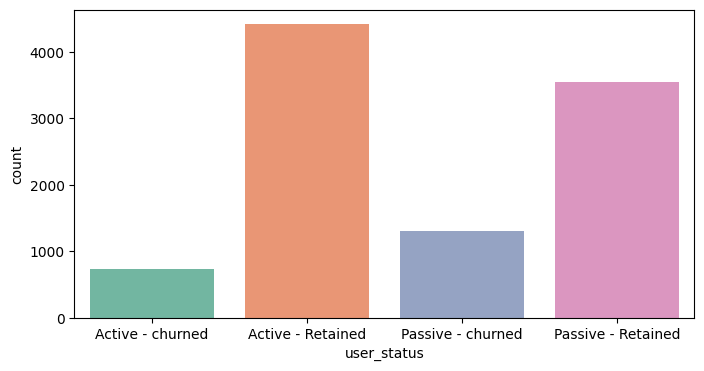

In [43]:
plt.subplots(figsize = ([8,4]))
sns.countplot(x='user_status' ,palette="Set2" , data=data )
plt.show()

# 

## From the above visualizations, we can conclude that people in the 40–60 age group are less likely to be retained.


## People from France have better chances of being retained, followed by Spain and Germany, because the majority of bank customers are from France, increasing the possibility of providing good services. Moving forward, males have a higher retention rate as compared to females.

## As per my observation, there is not much difference in credit scores between retained and churned customers, but people with good credit scores are more likely to be retained.

## People who have credit cards are more hesitant.Customers who have credit cards and actively use bank services are more likely to be retained, according to research.

## Also, there is no impact of salary or product number on churning, and surprisingly, people with good bank balances are being churned.